In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

In [2]:
data = pd.read_csv('data/added_features.csv', sep = ';')

In [3]:
numerical = ['totalSaving', 'customerReturnProbability', 'totalOrderPrice', 'minMaxSpanPrice']
categorical = ['hasVoucher', 'modeQuantity', 'monthOfYear', 'sameArticleInOrder']
target = 'returnQuantity'

In [4]:
def stacked_barplot(data, column, target, width = 0.5):    
    classes = np.unique(data[target])

    #initialize color map accorsing to number of classe labels
    norm = colors.Normalize(vmin = 0, vmax = len(classes)-1)
    cmap = cm.nipy_spectral                                                     #high local contrast
    m = cm.ScalarMappable(norm=norm, cmap=cmap)
    color_codes = list(range(len(classes)))

    plt.xlabel(column)
    plt.ylabel('counts')
    plt.title(target + ' split up by ' + column)
    
    #labels for x-axis
    categories = np.unique(data[column])
    plt.xticks(categories + width/2, categories)

    #for savig current hight of each bar
    last_bottom = pd.Series(index = categories, data = [0]*len(categories)) 
    
    for (class_label, color_code) in zip(classes, color_codes):
        current_data = data.loc[data.returnQuantity == class_label, column]
        values, heights = np.unique(current_data, return_counts = True)
        
        plt.bar(values, heights, bottom = last_bottom[values], 
                color =  m.to_rgba(color_code), width = width)
        last_bottom[values] = last_bottom[values] + heights
    
    plt.show()
  

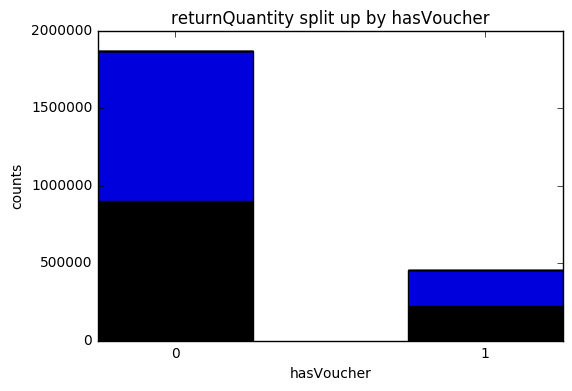

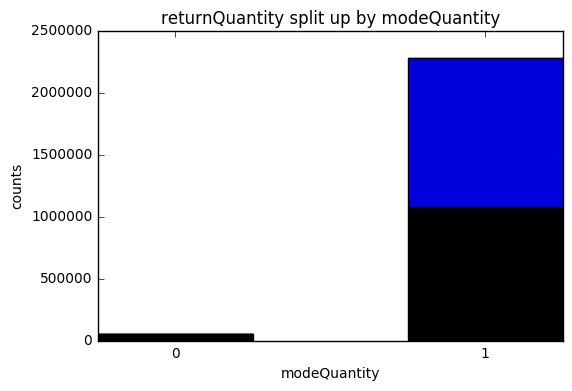

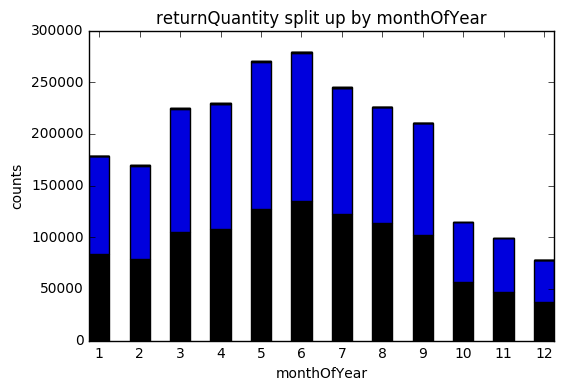

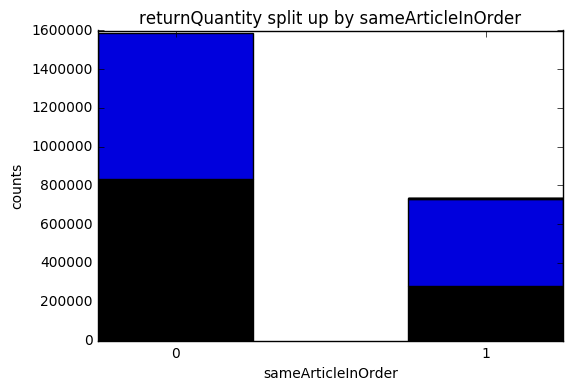

In [5]:
for c in categorical:
    stacked_barplot(data, c, target, 0.5)

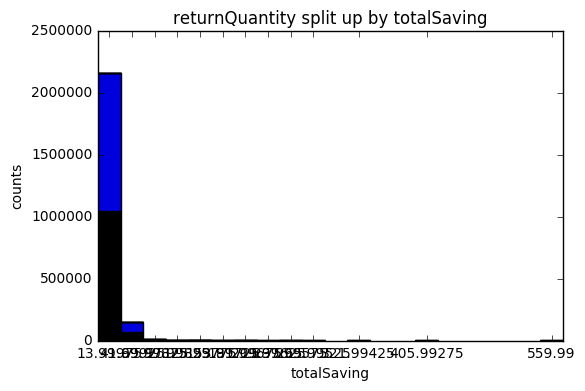

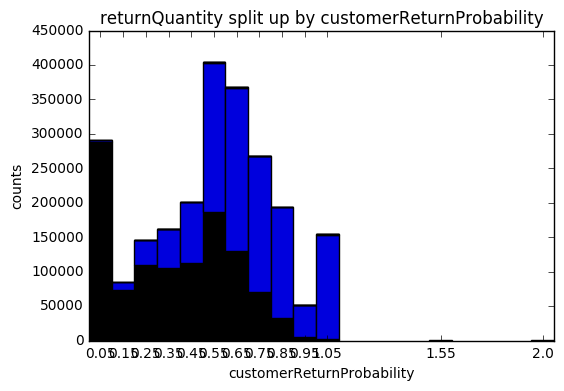

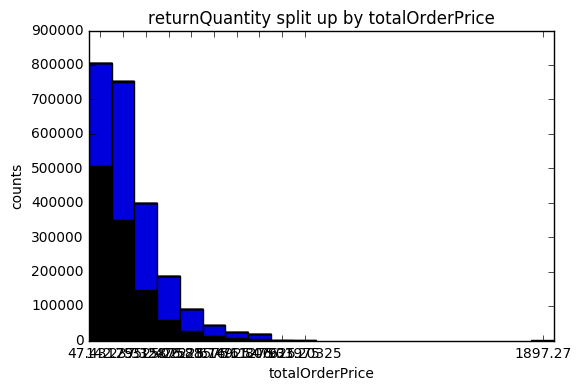

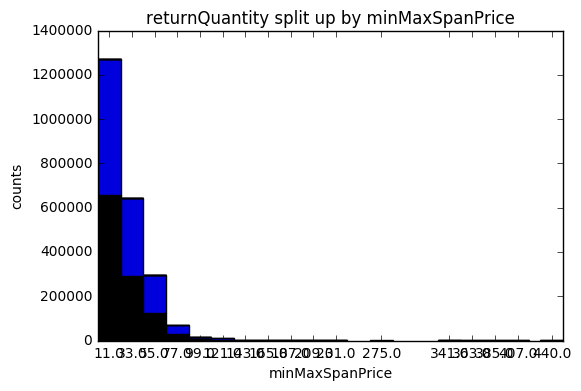

In [6]:
# for continuous one may use np.histogram() for discretizing
for c in numerical:
    counts, bins = np.histogram(data[c], 20)
    bin_boundaries = [(a, b) for a, b in zip(bins[:len(bins)-1], bins[1:])]
    
    for b in bin_boundaries:
        condition = np.logical_and(b[0] <= data[c], data[c] < b[1])
        data.loc[condition, c] = (b[0] + b[1])/2
                                   
    stacked_barplot(data, c, target, bin_boundaries[0][1] - bin_boundaries[0][0])